# Personality Analysis Network
## An Artificial Neural Network to analyze the Big Five Personality Traits

### Import Required Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import *
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import *
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


### Load the Dataset

In [2]:
x = pd.read_csv('Csv/x_features.csv')
y = pd.read_csv('Csv/y_features.csv')
x.shape, y.shape

((96, 13), (96, 11))

## Preprocessing

### 1. Scale the features in the range [0 - 1]

In [3]:
y_raw = y[['id','N (Raw)','E (Raw)','O (Raw)','A (Raw)','C(Raw)']].copy()
y_t = y[['id','N (T score)','E(T score)','O (T score)','A (T score)','C(T score)']].copy()

x.drop('id',inplace=True,axis=1)
y_raw.drop('id',inplace=True,axis=1)
y_t.drop('id',inplace=True,axis=1)

scaler1=MinMaxScaler()
scaler2=MinMaxScaler()
scaler3=MinMaxScaler()
scaler4=MinMaxScaler()
scaler5=MinMaxScaler()
scaler6=MinMaxScaler()
scaler7=MinMaxScaler()
scaler8=MinMaxScaler()

x.drop(['Qualifiaction','Name ','Age ','Gender'],axis=1,inplace=True)

x['baseline']=scaler1.fit_transform(np.array(x['baseline']).reshape(-1,1))
x['pen_pressure']=scaler2.fit_transform(np.array(x['pen_pressure']).reshape(-1,1))
x['letter_size']=scaler3.fit_transform(np.array(x['letter_size']).reshape(-1,1))
x['line_spacing']=scaler4.fit_transform(np.array(x['line_spacing']).reshape(-1,1))
x['word_spacing']=scaler5.fit_transform(np.array(x['word_spacing']).reshape(-1,1))
x['width']=scaler6.fit_transform(np.array(x['width']).reshape(-1,1))
x['height']=scaler7.fit_transform(np.array(x['height']).reshape(-1,1))
x['bar-height']=scaler8.fit_transform(np.array(x['bar-height']).reshape(-1,1))
x.columns

Index(['baseline', 'pen_pressure', 'letter_size', 'word_spacing',
       'line_spacing', 'width', 'height', 'bar-height'],
      dtype='object')

### 2. Generate Categorical Labels from Scores

In [4]:
#labels y 

for i in range(len(y_t)):
    if(y_t['N (T score)'][i]>=26 and y_t['N (T score)'][i]<=34):
        y_t['N (T score)'][i]=0
        
    elif(y_t['N (T score)'][i]>=35 and y_t['N (T score)'][i]<=44):
        y_t['N (T score)'][i]=1
        
    elif(y_t['N (T score)'][i]>=45 and y_t['N (T score)'][i]<=55):
        y_t['N (T score)'][i]=2
        
    elif(y_t['N (T score)'][i]>=56 and y_t['N (T score)'][i]<=65):
        y_t['N (T score)'][i]=3
     
    elif(y_t['N (T score)'][i]>=66 and y_t['N (T score)'][i]<=74):
        y_t['N (T score)'][i]=4
        
    
        
    
    if(y_t['E(T score)'][i]>=26 and y_t['E(T score)'][i]<=34):
        y_t['E(T score)'][i]=0
        
    elif(y_t['E(T score)'][i]>=35 and y_t['E(T score)'][i]<=44):
        y_t['E(T score)'][i]=1
        
    elif(y_t['E(T score)'][i]>=45 and y_t['E(T score)'][i]<=55):
        y_t['E(T score)'][i]=2
        
    elif(y_t['E(T score)'][i]>=56 and y_t['E(T score)'][i]<=65):
        y_t['E(T score)'][i]=3
        
    elif(y_t['E(T score)'][i]>=66 and y_t['E(T score)'][i]<=74):
        y_t['E(T score)'][i]=4
    
    
    
    if(y_t['O (T score)'][i]>=26 and y_t['O (T score)'][i]<=34):
        y_t['O (T score)'][i]=0
        
    elif(y_t['O (T score)'][i]>=35 and y_t['O (T score)'][i]<=44):
        y_t['O (T score)'][i]=1
        
    elif(y_t['O (T score)'][i]>=45 and y_t['O (T score)'][i]<=55):
        y_t['O (T score)'][i]=2
        
    elif(y_t['O (T score)'][i]>=56 and y_t['O (T score)'][i]<=65):
        y_t['O (T score)'][i]=3
        
    elif(y_t['O (T score)'][i]>=66 and y_t['O (T score)'][i]<=74):
        y_t['O (T score)'][i]=4
    
        
    
    if(y_t['A (T score)'][i]>=26 and y_t['A (T score)'][i]<=34):
        y_t['A (T score)'][i]=0
        
    elif(y_t['A (T score)'][i]>=35 and y_t['A (T score)'][i]<=44):
        y_t['A (T score)'][i]=1
        
    elif(y_t['A (T score)'][i]>=45 and y_t['A (T score)'][i]<=55):
        y_t['A (T score)'][i]=2
        
    elif(y_t['A (T score)'][i]>=56 and y_t['A (T score)'][i]<=65):
        y_t['A (T score)'][i]=3
        
    elif(y_t['A (T score)'][i]>=66 and y_t['A (T score)'][i]<=74):
        y_t['A (T score)'][i]=4
        
   
 
    if(y_t['C(T score)'][i]>=26 and y_t['C(T score)'][i]<=34):
        y_t['C(T score)'][i]=0
        
    elif(y_t['C(T score)'][i]>=35 and y_t['C(T score)'][i]<=44):
        y_t['C(T score)'][i]=1
        
    elif(y_t['C(T score)'][i]>=45 and y_t['C(T score)'][i]<=55):
        y_t['C(T score)'][i]=2
        
    elif(y_t['C(T score)'][i]>=56 and y_t['C(T score)'][i]<=65):
        y_t['C(T score)'][i]=3
        
    elif(y_t['C(T score)'][i]>=66 and y_t['C(T score)'][i]<=74):
        y_t['C(T score)'][i]=4
    
    else:
        incorrect_ids.append(y_t['id'][i])

y_t1=np.array(y_t['N (T score)'])
y_t2=np.array(y_t['E(T score)'])
y_t3=np.array(y_t['O (T score)'])
y_t4=np.array(y_t['A (T score)'])
y_t5=np.array(y_t['C(T score)'])

y_t1.astype(float)
y_t2.astype(float)
y_t3.astype(float)
y_t4.astype(float)
y_t5.astype(float)

y_t1.shape,y_t2.shape,y_t3.shape,y_t4.shape,y_t5.shape

((96,), (96,), (96,), (96,), (96,))

In [5]:
from keras.utils.np_utils import to_categorical

y_t1ohe = to_categorical(y_t1,num_classes=5)
y_t2ohe = to_categorical(y_t2,num_classes=5)
y_t3ohe = to_categorical(y_t3,num_classes=5)
y_t4ohe = to_categorical(y_t4,num_classes=5)
y_t5ohe = to_categorical(y_t5,num_classes=5)

### 3. Generate the Training and Testing Sets for the 5 Personalities

In [6]:
# X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y_t1ohe,test_size=0.2, random_state=42)
# X_train3, X_test3, y_train3, y_test3 = train_test_split(x, y_t2ohe,test_size=0.2, random_state=42)
# X_train4, X_test4, y_train4, y_test4 = train_test_split(x, y_t3ohe,test_size=0.2, random_state=42)
# X_train5, X_test5, y_train5, y_test5 = train_test_split(x, y_t4ohe,test_size=0.2, random_state=42)
# X_train6, X_test6, y_train6, y_test6 = train_test_split(x, y_t5ohe,test_size=0.2, random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y_t1,test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(x, y_t2,test_size=0.2, random_state=42)
X_train4, X_test4, y_train4, y_test4 = train_test_split(x, y_t3,test_size=0.2, random_state=42)
X_train5, X_test5, y_train5, y_test5 = train_test_split(x, y_t4,test_size=0.2, random_state=42)
X_train6, X_test6, y_train6, y_test6 = train_test_split(x, y_t5,test_size=0.2, random_state=42)

## Model Construction and Training

### 1. Define the model architecture for Neurotocism

In [11]:
model_2 = Sequential()
model_2.add(Dense(1, input_dim=8, kernel_initializer='glorot_uniform', activation='relu'))
model_2.add(Dense(2, kernel_initializer='glorot_uniform', activation='relu'))
model_2.add(Dense(3, kernel_initializer='glorot_uniform', activation='relu'))
model_2.add(Dense(5, kernel_initializer='glorot_uniform',activation='softmax'))
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.001)
# Compile model
model_2.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['sparse_categorical_accuracy'])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 9         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 4         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 20        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


### 2. Train the model

In [14]:
hist = model_2.fit(X_train2,y_train2,validation_data=(X_test2,y_test2),epochs=100,batch_size=5)


Train on 76 samples, validate on 20 samples
Epoch 1/100
76/76 [==============================] - 2s 31ms/step - loss: 1.5952 - sparse_categorical_accuracy: 0.3553 - val_loss: 1.5650 - val_sparse_categorical_accuracy: 0.7000
Epoch 2/100
76/76 [==============================] - 0s 735us/step - loss: 1.5761 - sparse_categorical_accuracy: 0.5789 - val_loss: 1.5448 - val_sparse_categorical_accuracy: 0.7000
Epoch 3/100
76/76 [==============================] - 0s 709us/step - loss: 1.5596 - sparse_categorical_accuracy: 0.5789 - val_loss: 1.5264 - val_sparse_categorical_accuracy: 0.7000
Epoch 4/100
76/76 [==============================] - 0s 656us/step - loss: 1.5438 - sparse_categorical_accuracy: 0.5789 - val_loss: 1.5035 - val_sparse_categorical_accuracy: 0.7000
Epoch 5/100
76/76 [==============================] - 0s 682us/step - loss: 1.5269 - sparse_categorical_accuracy: 0.5789 - val_loss: 1.4855 - val_sparse_categorical_accuracy: 0.7000
Epoch 6/100
76/76 [==============================] 

Epoch 45/100
76/76 [==============================] - 0s 551us/step - loss: 1.0448 - sparse_categorical_accuracy: 0.5789 - val_loss: 0.8780 - val_sparse_categorical_accuracy: 0.7000
Epoch 46/100
76/76 [==============================] - 0s 564us/step - loss: 1.0416 - sparse_categorical_accuracy: 0.5789 - val_loss: 0.8713 - val_sparse_categorical_accuracy: 0.7000
Epoch 47/100
76/76 [==============================] - 0s 682us/step - loss: 1.0391 - sparse_categorical_accuracy: 0.5789 - val_loss: 0.8659 - val_sparse_categorical_accuracy: 0.7000
Epoch 48/100
76/76 [==============================] - 0s 591us/step - loss: 1.0358 - sparse_categorical_accuracy: 0.5789 - val_loss: 0.8652 - val_sparse_categorical_accuracy: 0.7000
Epoch 49/100
76/76 [==============================] - 0s 564us/step - loss: 1.0334 - sparse_categorical_accuracy: 0.5789 - val_loss: 0.8597 - val_sparse_categorical_accuracy: 0.7000
Epoch 50/100
76/76 [==============================] - 0s 525us/step - loss: 1.0310 - spars

76/76 [==============================] - 0s 538us/step - loss: 0.9867 - sparse_categorical_accuracy: 0.5789 - val_loss: 0.8234 - val_sparse_categorical_accuracy: 0.7000
Epoch 91/100
76/76 [==============================] - 0s 551us/step - loss: 0.9874 - sparse_categorical_accuracy: 0.5789 - val_loss: 0.8211 - val_sparse_categorical_accuracy: 0.7000
Epoch 92/100
76/76 [==============================] - 0s 538us/step - loss: 0.9864 - sparse_categorical_accuracy: 0.5789 - val_loss: 0.8192 - val_sparse_categorical_accuracy: 0.7000
Epoch 93/100
76/76 [==============================] - 0s 538us/step - loss: 0.9866 - sparse_categorical_accuracy: 0.5789 - val_loss: 0.8167 - val_sparse_categorical_accuracy: 0.7000
Epoch 94/100
76/76 [==============================] - 0s 552us/step - loss: 0.9860 - sparse_categorical_accuracy: 0.5789 - val_loss: 0.8156 - val_sparse_categorical_accuracy: 0.7000
Epoch 95/100
76/76 [==============================] - 0s 538us/step - loss: 0.9857 - sparse_categorical

### 3. Make Predictions

In [20]:
from sklearn.metrics import f1_score
preds = model_2.predict(X_test2)
preds = np.array([np.argmax(a) for a in preds])
print(f1_score(y_test2,preds,average='micro'))

0.7


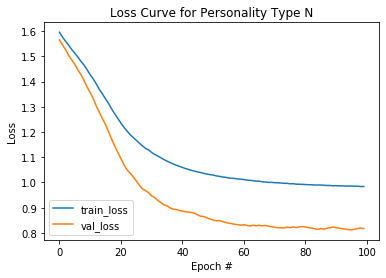

In [42]:
plt.plot(hist.history["loss"],label="train_loss")
plt.plot(hist.history["val_loss"],label="val_loss")
plt.title("Loss Curve for Personality Type N")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig("ModelforN.png")
model_2.save('N.h5')

In [23]:
model_3 = Sequential()
model_3.add(Dense(1, input_dim=8, kernel_initializer='glorot_uniform', activation='relu'))
model_3.add(Dense(2, kernel_initializer='glorot_uniform', activation='relu'))
model_3.add(Dense(3, kernel_initializer='glorot_uniform', activation='relu'))
model_3.add(Dense(5, kernel_initializer='glorot_uniform',activation='softmax'))
# Compile model
model_3.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['sparse_categorical_accuracy'])

In [24]:
hist3 = model_3.fit(X_train3,y_train3,validation_data=(X_test3,y_test3),epochs=100,batch_size=5)

Train on 76 samples, validate on 20 samples
Epoch 1/100
76/76 [==============================] - 0s 2ms/step - loss: 1.5727 - sparse_categorical_accuracy: 0.3553 - val_loss: 1.5694 - val_sparse_categorical_accuracy: 0.1000
Epoch 2/100
76/76 [==============================] - 0s 577us/step - loss: 1.5389 - sparse_categorical_accuracy: 0.3553 - val_loss: 1.5427 - val_sparse_categorical_accuracy: 0.1000
Epoch 3/100
76/76 [==============================] - 0s 577us/step - loss: 1.5092 - sparse_categorical_accuracy: 0.3553 - val_loss: 1.5165 - val_sparse_categorical_accuracy: 0.1000
Epoch 4/100
76/76 [==============================] - 0s 577us/step - loss: 1.4783 - sparse_categorical_accuracy: 0.3553 - val_loss: 1.4909 - val_sparse_categorical_accuracy: 0.1000
Epoch 5/100
76/76 [==============================] - 0s 551us/step - loss: 1.4460 - sparse_categorical_accuracy: 0.3553 - val_loss: 1.4615 - val_sparse_categorical_accuracy: 0.1000
Epoch 6/100
76/76 [==============================] - 

76/76 [==============================] - 0s 551us/step - loss: 0.7952 - sparse_categorical_accuracy: 0.6053 - val_loss: 0.6973 - val_sparse_categorical_accuracy: 0.8500
Epoch 91/100
76/76 [==============================] - 0s 564us/step - loss: 0.7962 - sparse_categorical_accuracy: 0.6053 - val_loss: 0.6950 - val_sparse_categorical_accuracy: 0.8500
Epoch 92/100
76/76 [==============================] - 0s 538us/step - loss: 0.7947 - sparse_categorical_accuracy: 0.6053 - val_loss: 0.6995 - val_sparse_categorical_accuracy: 0.8500
Epoch 93/100
76/76 [==============================] - 0s 564us/step - loss: 0.7946 - sparse_categorical_accuracy: 0.6053 - val_loss: 0.7038 - val_sparse_categorical_accuracy: 0.8500
Epoch 94/100
76/76 [==============================] - 0s 525us/step - loss: 0.7953 - sparse_categorical_accuracy: 0.6053 - val_loss: 0.7058 - val_sparse_categorical_accuracy: 0.8500
Epoch 95/100
76/76 [==============================] - 0s 577us/step - loss: 0.7942 - sparse_categorical

In [27]:
from sklearn.metrics import f1_score
preds = model_3.predict(X_test3)
preds = np.array([np.argmax(a) for a in preds])
print(f1_score(y_test3,preds,average='micro'))

0.85


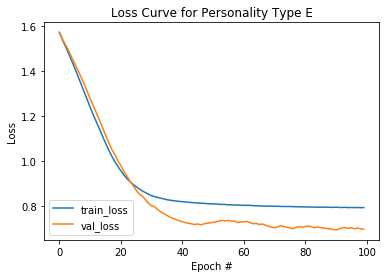

In [29]:
plt.plot(hist3.history["loss"],label="train_loss")
plt.plot(hist3.history["val_loss"],label="val_loss")
plt.title("Loss Curve for Personality Type E")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig("ModelforE.png")
model_3.save('E.h5')

In [30]:
model_4 = Sequential()
model_4.add(Dense(1, input_dim=8, kernel_initializer='glorot_uniform', activation='relu'))
model_4.add(Dense(2, kernel_initializer='glorot_uniform', activation='relu'))
model_4.add(Dense(3, kernel_initializer='glorot_uniform', activation='relu'))
model_4.add(Dense(5, kernel_initializer='glorot_uniform',activation='softmax'))
# Compile model
model_4.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['sparse_categorical_accuracy'])

In [31]:
hist4 = model_4.fit(X_train3,y_train3,validation_data=(X_test3,y_test3),epochs=100,batch_size=5)

Train on 76 samples, validate on 20 samples
Epoch 1/100
76/76 [==============================] - 0s 2ms/step - loss: 1.5961 - sparse_categorical_accuracy: 0.5789 - val_loss: 1.5825 - val_sparse_categorical_accuracy: 0.8500
Epoch 2/100
76/76 [==============================] - 0s 603us/step - loss: 1.5779 - sparse_categorical_accuracy: 0.6053 - val_loss: 1.5666 - val_sparse_categorical_accuracy: 0.8500
Epoch 3/100
76/76 [==============================] - 0s 577us/step - loss: 1.5626 - sparse_categorical_accuracy: 0.6053 - val_loss: 1.5511 - val_sparse_categorical_accuracy: 0.8500
Epoch 4/100
76/76 [==============================] - 0s 564us/step - loss: 1.5479 - sparse_categorical_accuracy: 0.6053 - val_loss: 1.5344 - val_sparse_categorical_accuracy: 0.8500
Epoch 5/100
76/76 [==============================] - 0s 551us/step - loss: 1.5334 - sparse_categorical_accuracy: 0.6053 - val_loss: 1.5201 - val_sparse_categorical_accuracy: 0.8500
Epoch 6/100
76/76 [==============================] - 

Epoch 46/100
76/76 [==============================] - 0s 591us/step - loss: 1.1062 - sparse_categorical_accuracy: 0.6053 - val_loss: 1.0394 - val_sparse_categorical_accuracy: 0.8500
Epoch 47/100
76/76 [==============================] - 0s 551us/step - loss: 1.0997 - sparse_categorical_accuracy: 0.6053 - val_loss: 1.0322 - val_sparse_categorical_accuracy: 0.8500
Epoch 48/100
76/76 [==============================] - 0s 591us/step - loss: 1.0933 - sparse_categorical_accuracy: 0.6053 - val_loss: 1.0235 - val_sparse_categorical_accuracy: 0.8500
Epoch 49/100
76/76 [==============================] - 0s 525us/step - loss: 1.0869 - sparse_categorical_accuracy: 0.6053 - val_loss: 1.0171 - val_sparse_categorical_accuracy: 0.8500
Epoch 50/100
76/76 [==============================] - 0s 551us/step - loss: 1.0808 - sparse_categorical_accuracy: 0.6053 - val_loss: 1.0086 - val_sparse_categorical_accuracy: 0.8500
Epoch 51/100
76/76 [==============================] - 0s 564us/step - loss: 1.0743 - spars

Epoch 91/100
76/76 [==============================] - 0s 604us/step - loss: 0.9163 - sparse_categorical_accuracy: 0.6053 - val_loss: 0.8023 - val_sparse_categorical_accuracy: 0.8500
Epoch 92/100
76/76 [==============================] - 0s 551us/step - loss: 0.9141 - sparse_categorical_accuracy: 0.6053 - val_loss: 0.7991 - val_sparse_categorical_accuracy: 0.8500
Epoch 93/100
76/76 [==============================] - 0s 551us/step - loss: 0.9116 - sparse_categorical_accuracy: 0.6053 - val_loss: 0.7957 - val_sparse_categorical_accuracy: 0.8500
Epoch 94/100
76/76 [==============================] - 0s 577us/step - loss: 0.9094 - sparse_categorical_accuracy: 0.6053 - val_loss: 0.7923 - val_sparse_categorical_accuracy: 0.8500
Epoch 95/100
76/76 [==============================] - 0s 564us/step - loss: 0.9070 - sparse_categorical_accuracy: 0.6053 - val_loss: 0.7887 - val_sparse_categorical_accuracy: 0.8500
Epoch 96/100
76/76 [==============================] - 0s 538us/step - loss: 0.9050 - spars

In [32]:
from sklearn.metrics import f1_score
preds = model_4.predict(X_test4)
preds = np.array([np.argmax(a) for a in preds])
print(f1_score(y_test4,preds,average='micro'))

0.65


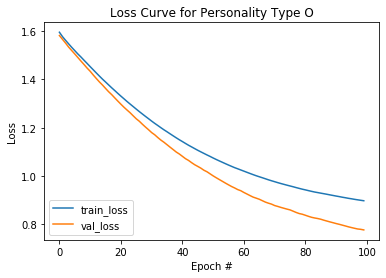

In [34]:
plt.plot(hist4.history["loss"],label="train_loss")
plt.plot(hist4.history["val_loss"],label="val_loss")
plt.title("Loss Curve for Personality Type O")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig("ModelforO.png")
model_4.save('O.h5')

In [36]:
model_5 = Sequential()
model_5.add(Dense(1, input_dim=8, kernel_initializer='glorot_uniform', activation='relu'))
model_5.add(Dense(2, kernel_initializer='glorot_uniform', activation='relu'))
model_5.add(Dense(4, kernel_initializer='glorot_uniform', activation='relu'))
model_5.add(Dense(4, kernel_initializer='glorot_uniform', activation='relu'))
model_5.add(Dense(5, kernel_initializer='glorot_uniform',activation='softmax'))
# Compile model
model_5.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['sparse_categorical_accuracy'])
hist5 = model_5.fit(X_train5,y_train5,validation_data=(X_test5,y_test5),epochs=100,batch_size=5)

Train on 76 samples, validate on 20 samples
Epoch 1/100
76/76 [==============================] - 0s 2ms/step - loss: 1.6110 - sparse_categorical_accuracy: 0.0658 - val_loss: 1.5961 - val_sparse_categorical_accuracy: 0.3500
Epoch 2/100
76/76 [==============================] - 0s 616us/step - loss: 1.5967 - sparse_categorical_accuracy: 0.3421 - val_loss: 1.5825 - val_sparse_categorical_accuracy: 0.6500
Epoch 3/100
76/76 [==============================] - 0s 618us/step - loss: 1.5862 - sparse_categorical_accuracy: 0.4342 - val_loss: 1.5700 - val_sparse_categorical_accuracy: 0.7500
Epoch 4/100
76/76 [==============================] - 0s 761us/step - loss: 1.5768 - sparse_categorical_accuracy: 0.4737 - val_loss: 1.5595 - val_sparse_categorical_accuracy: 0.7500
Epoch 5/100
76/76 [==============================] - 0s 696us/step - loss: 1.5677 - sparse_categorical_accuracy: 0.5000 - val_loss: 1.5470 - val_sparse_categorical_accuracy: 0.7500
Epoch 6/100
76/76 [==============================] - 

Epoch 46/100
76/76 [==============================] - 0s 800us/step - loss: 1.1910 - sparse_categorical_accuracy: 0.5000 - val_loss: 0.9925 - val_sparse_categorical_accuracy: 0.7500
Epoch 47/100
76/76 [==============================] - 0s 722us/step - loss: 1.1887 - sparse_categorical_accuracy: 0.5000 - val_loss: 0.9907 - val_sparse_categorical_accuracy: 0.7500
Epoch 48/100
76/76 [==============================] - 0s 591us/step - loss: 1.1867 - sparse_categorical_accuracy: 0.5000 - val_loss: 0.9935 - val_sparse_categorical_accuracy: 0.7500
Epoch 49/100
76/76 [==============================] - 0s 591us/step - loss: 1.1847 - sparse_categorical_accuracy: 0.5000 - val_loss: 0.9918 - val_sparse_categorical_accuracy: 0.7500
Epoch 50/100
76/76 [==============================] - 0s 604us/step - loss: 1.1838 - sparse_categorical_accuracy: 0.5000 - val_loss: 0.9903 - val_sparse_categorical_accuracy: 0.7500
Epoch 51/100
76/76 [==============================] - 0s 591us/step - loss: 1.1817 - spars

76/76 [==============================] - 0s 590us/step - loss: 1.1547 - sparse_categorical_accuracy: 0.5000 - val_loss: 1.0782 - val_sparse_categorical_accuracy: 0.7500
Epoch 92/100
76/76 [==============================] - 0s 604us/step - loss: 1.1544 - sparse_categorical_accuracy: 0.5000 - val_loss: 1.0781 - val_sparse_categorical_accuracy: 0.7500
Epoch 93/100
76/76 [==============================] - 0s 591us/step - loss: 1.1536 - sparse_categorical_accuracy: 0.5000 - val_loss: 1.0837 - val_sparse_categorical_accuracy: 0.7500
Epoch 94/100
76/76 [==============================] - 0s 617us/step - loss: 1.1542 - sparse_categorical_accuracy: 0.5000 - val_loss: 1.0877 - val_sparse_categorical_accuracy: 0.7500
Epoch 95/100
76/76 [==============================] - 0s 591us/step - loss: 1.1528 - sparse_categorical_accuracy: 0.5000 - val_loss: 1.0908 - val_sparse_categorical_accuracy: 0.7500
Epoch 96/100
76/76 [==============================] - 0s 604us/step - loss: 1.1536 - sparse_categorical

In [37]:
from sklearn.metrics import f1_score
preds = model_5.predict(X_test5)
preds = np.array([np.argmax(a) for a in preds])
print(f1_score(y_test5,preds,average='micro'))

0.75


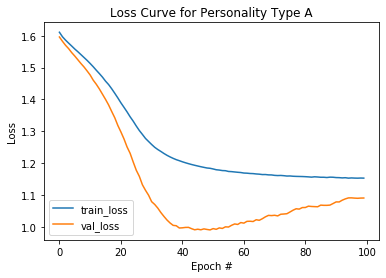

In [41]:

plt.plot(hist5.history["loss"],label="train_loss")
plt.plot(hist5.history["val_loss"],label="val_loss")
plt.title("Loss Curve for Personality Type A")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig("ModelforA.png")
model_5.save('A.h5')

In [39]:
model_6 = Sequential()
model_6.add(Dense(1, input_dim=8, kernel_initializer='glorot_uniform', activation='relu'))
model_6.add(Dense(2, kernel_initializer='glorot_uniform', activation='relu'))
model_6.add(Dense(3, kernel_initializer='glorot_uniform', activation='relu'))
model_6.add(Dense(4, kernel_initializer='glorot_uniform', activation='relu'))
model_6.add(Dense(5, kernel_initializer='glorot_uniform', activation='relu'))
model_6.add(Dense(6, kernel_initializer='glorot_uniform', activation='relu'))
model_6.add(Dense(5, kernel_initializer='glorot_uniform',activation='softmax'))
# Compile model
model_6.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['sparse_categorical_accuracy'])
hist6 = model_6.fit(X_train6,y_train6,validation_data=(X_test6,y_test6),epochs=100,batch_size=5)



Train on 76 samples, validate on 20 samples
Epoch 1/100
76/76 [==============================] - 0s 3ms/step - loss: 1.6011 - sparse_categorical_accuracy: 0.4079 - val_loss: 1.5898 - val_sparse_categorical_accuracy: 0.6500
Epoch 2/100
76/76 [==============================] - 0s 709us/step - loss: 1.5892 - sparse_categorical_accuracy: 0.4868 - val_loss: 1.5756 - val_sparse_categorical_accuracy: 0.6500
Epoch 3/100
76/76 [==============================] - 0s 709us/step - loss: 1.5789 - sparse_categorical_accuracy: 0.4868 - val_loss: 1.5626 - val_sparse_categorical_accuracy: 0.6500
Epoch 4/100
76/76 [==============================] - 0s 709us/step - loss: 1.5690 - sparse_categorical_accuracy: 0.4868 - val_loss: 1.5504 - val_sparse_categorical_accuracy: 0.6500
Epoch 5/100
76/76 [==============================] - 0s 695us/step - loss: 1.5593 - sparse_categorical_accuracy: 0.4868 - val_loss: 1.5372 - val_sparse_categorical_accuracy: 0.6500
Epoch 6/100
76/76 [==============================] - 

Epoch 46/100
76/76 [==============================] - 0s 735us/step - loss: 1.2952 - sparse_categorical_accuracy: 0.4868 - val_loss: 1.1789 - val_sparse_categorical_accuracy: 0.6500
Epoch 47/100
76/76 [==============================] - 0s 722us/step - loss: 1.2911 - sparse_categorical_accuracy: 0.4868 - val_loss: 1.1733 - val_sparse_categorical_accuracy: 0.6500
Epoch 48/100
76/76 [==============================] - 0s 709us/step - loss: 1.2873 - sparse_categorical_accuracy: 0.4868 - val_loss: 1.1672 - val_sparse_categorical_accuracy: 0.6500
Epoch 49/100
76/76 [==============================] - 0s 682us/step - loss: 1.2834 - sparse_categorical_accuracy: 0.4868 - val_loss: 1.1611 - val_sparse_categorical_accuracy: 0.6500
Epoch 50/100
76/76 [==============================] - 0s 695us/step - loss: 1.2796 - sparse_categorical_accuracy: 0.4868 - val_loss: 1.1553 - val_sparse_categorical_accuracy: 0.6500
Epoch 51/100
76/76 [==============================] - 0s 761us/step - loss: 1.2759 - spars

76/76 [==============================] - 0s 682us/step - loss: 1.1873 - sparse_categorical_accuracy: 0.4868 - val_loss: 1.0048 - val_sparse_categorical_accuracy: 0.6500
Epoch 92/100
76/76 [==============================] - 0s 682us/step - loss: 1.1861 - sparse_categorical_accuracy: 0.4868 - val_loss: 1.0024 - val_sparse_categorical_accuracy: 0.6500
Epoch 93/100
76/76 [==============================] - 0s 656us/step - loss: 1.1848 - sparse_categorical_accuracy: 0.4868 - val_loss: 1.0006 - val_sparse_categorical_accuracy: 0.6500
Epoch 94/100
76/76 [==============================] - 0s 682us/step - loss: 1.1836 - sparse_categorical_accuracy: 0.4868 - val_loss: 0.9989 - val_sparse_categorical_accuracy: 0.6500
Epoch 95/100
76/76 [==============================] - 0s 696us/step - loss: 1.1826 - sparse_categorical_accuracy: 0.4868 - val_loss: 0.9972 - val_sparse_categorical_accuracy: 0.6500
Epoch 96/100
76/76 [==============================] - 0s 669us/step - loss: 1.1813 - sparse_categorical

In [26]:
from sklearn.metrics import f1_score
preds = model_6.predict(X_test6)
preds = np.array([np.argmax(a) for a in preds])
print(f1_score(y_test6,preds,average='micro'))

0.65


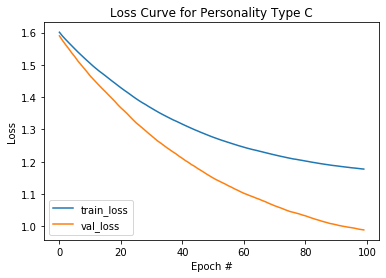

In [40]:

plt.plot(hist6.history["loss"],label="train_loss")
plt.plot(hist6.history["val_loss"],label="val_loss")
plt.title("Loss Curve for Personality Type C")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig("ModelforC.png")
model_6.save('C.h5')

# Perform Predictions using the Model

In [47]:
import keras.models as models

In [48]:
m_N = models.load_model('N.h5')
m_E = models.load_model('E.h5')
m_O = models.load_model('O.h5')
m_A = models.load_model('A.h5')
m_C = models.load_model('C.h5')